In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [21]:
df = pd.read_csv('/content/TECHM.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2006-08-28,TECHM,EQ,365.00,521.0,569.0,502.00,553.00,554.25,552.00,15166163,8.371760e+14,NaN,3777529,0.2491
1,2006-08-29,TECHM,EQ,554.25,555.0,563.9,535.55,536.10,539.30,547.59,3929113,2.151530e+14,NaN,727534,0.1852
2,2006-08-30,TECHM,EQ,539.30,537.0,542.9,521.50,529.00,528.10,529.55,2034983,1.077630e+14,NaN,345064,0.1696
3,2006-08-31,TECHM,EQ,528.10,525.0,544.0,515.00,539.35,538.45,532.89,1670990,8.904464e+13,NaN,286440,0.1714
4,2006-09-01,TECHM,EQ,538.45,539.0,549.0,535.10,541.35,541.85,542.46,1176195,6.380386e+13,NaN,213842,0.1818


In [22]:
number_simulation = 100
predict_day = 30

close = df['Close'].tolist()

returns = pd.DataFrame(close).pct_change()

last_price = close[-1]

results = pd.DataFrame()

avg_daily_ret = returns.mean()

variance = returns.var()

daily_vol = returns.std()

daily_drift = avg_daily_ret - (variance / 2)

drift = daily_drift - 0.5 * daily_vol ** 2

In [23]:
for i in tqdm(range(number_simulation)):
  prices = []
  prices.append(df.Close.iloc[-1])
  for d in range(predict_day):
    shock = [drift + daily_vol * np.random.normal()]
    shock = np.mean(shock)
    price = prices[-1] * np.exp(shock)
    prices.append(price)
  results[i] = prices

100%|██████████| 100/100 [00:00<00:00, 126.76it/s]


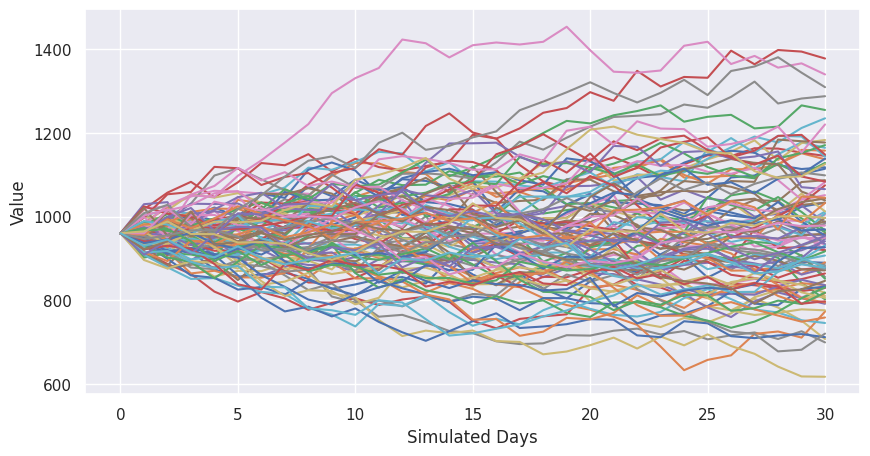

In [24]:
plt.figure(figsize=(10,5))
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated Days')
plt.show()

<ipython-input-27-a4305223dd07>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Close, norm_hist=True)
<ipython-input-27-a4305223dd07>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
<ipython-input-27-a4305223dd07>:15: UserWarning: 

`di

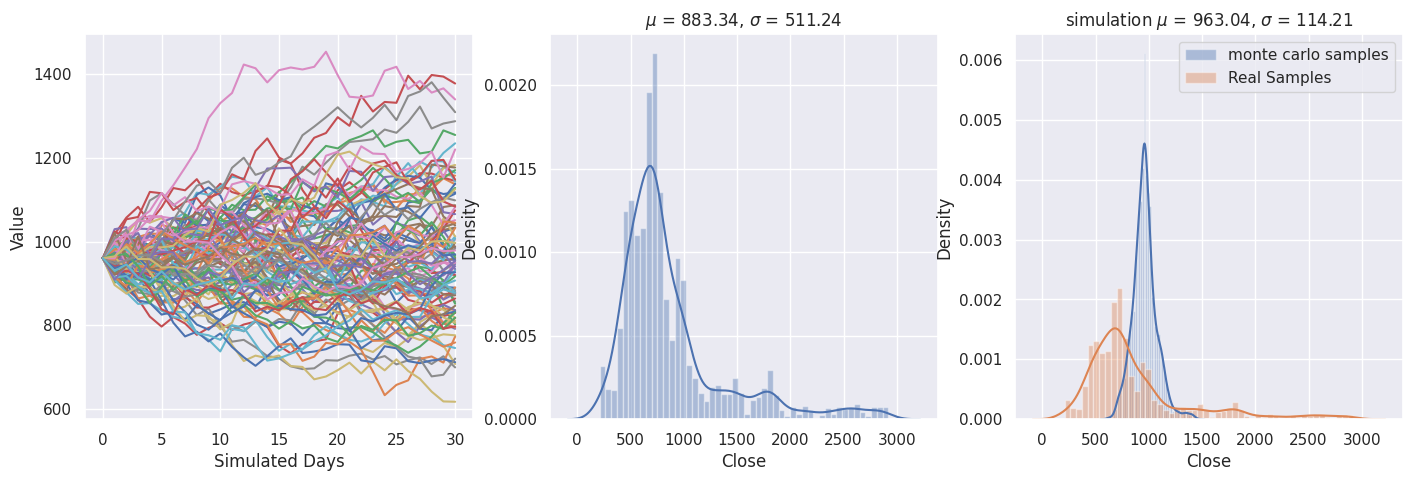

In [27]:
raveled = results.values.ravel()
raveled.sort()
cp_raveled = raveled.copy()

plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
plt.plot(results)
plt.ylabel('Value')
plt.xlabel('Simulated Days')
plt.subplot(1,3,2)
sns.distplot(df.Close, norm_hist=True)
plt.title('$\mu$ = %.2f, $\sigma$ = %.2f'%(df.Close.mean(),df.Close.std()))
plt.subplot(1,3,3)
sns.distplot(raveled,norm_hist=True,label='monte carlo samples')
sns.distplot(df.Close,norm_hist=True,label='Real Samples')
plt.title('simulation $\mu$ = %.2f, $\sigma$ = %.2f'%(raveled.mean(),raveled.std()))
plt.legend()
plt.show()